In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

In [4]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [5]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

In [12]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

/Users/gayathrigurram/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/gayathrigurram/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

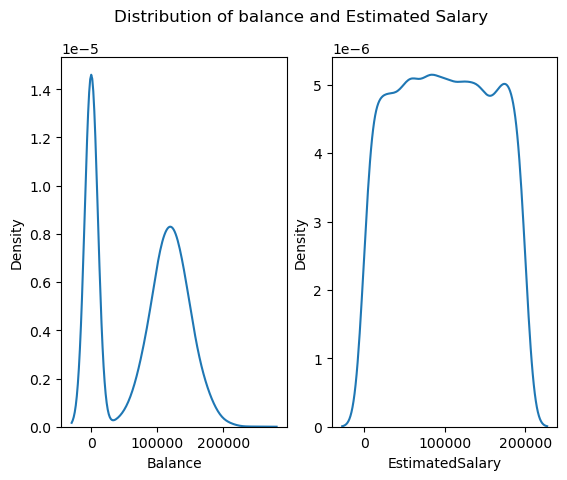

In [13]:
fig,axs=plt.subplots(ncols=2)
fig.suptitle('Distribution of balance and Estimated Salary')
sns.distplot(df.Balance,hist=False,ax=axs[0])
sns.distplot(df.EstimatedSalary,hist=False,ax=axs[1])

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
#df['Balance'].value_counts()
df['Balance_binary']=df['Balance'].where(df['Balance']==0,1)
df['Balance_binary'].value_counts()

1.0    6383
0.0    3617
Name: Balance_binary, dtype: int64

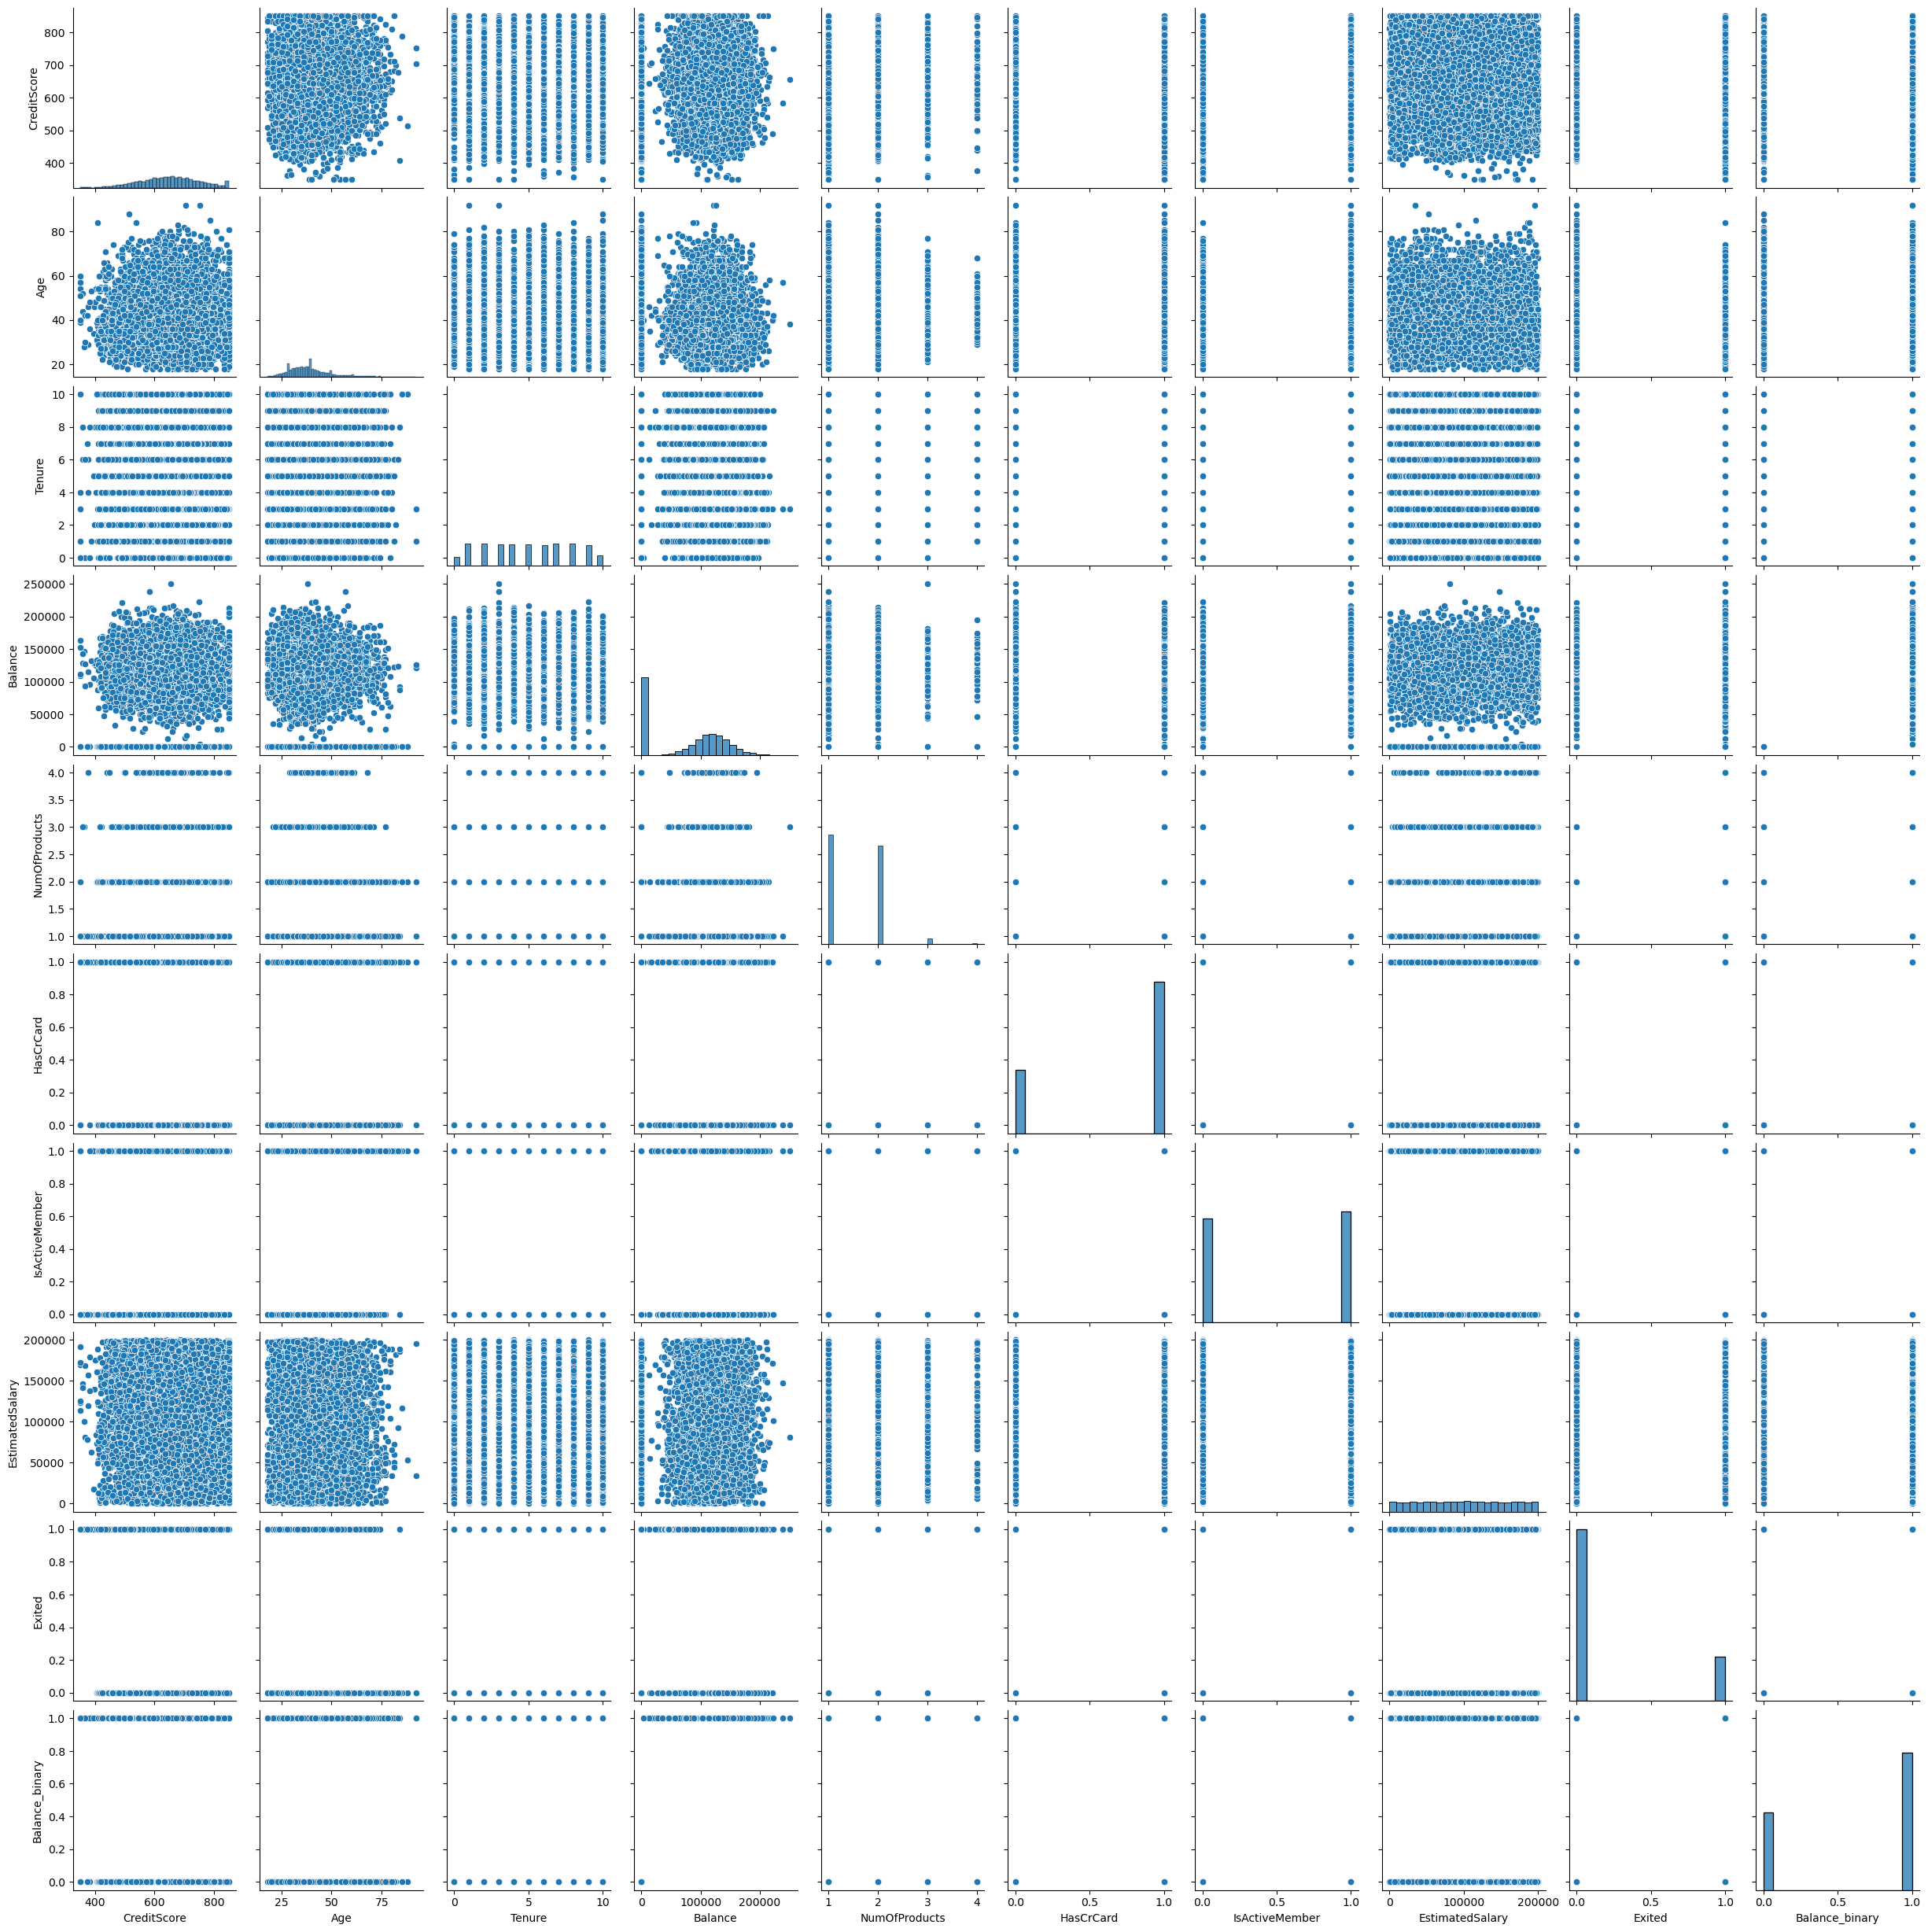

In [16]:
sns.pairplot(data=df)

This code creates a new column called 'Balance_binary' in the DataFrame 'df'. The values in this new column are determined by the values in the 'Balance' column. If the value in the 'Balance' column is 0, the corresponding value in the 'Balance_binary' column will also be 0. If the value in the 'Balance' column is not 0, the corresponding value in the 'Balance_binary' column will be 1.

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_binary
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.0


In [18]:
df[['Balance_binary','Exited']].groupby(['Balance_binary']).agg(['mean','count'])

Exited      
                    mean count
Balance_binary                
0.0             0.138236  3617
1.0             0.240796  6383

<AxesSubplot:>

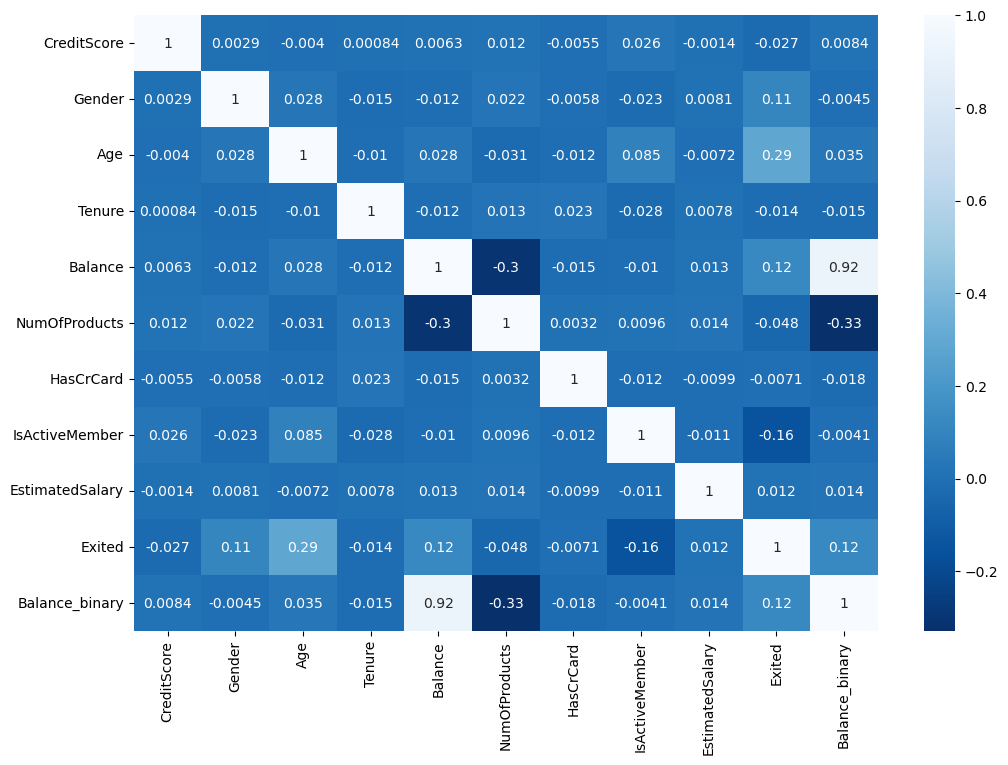

In [19]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='Blues_r',annot=True)

In [20]:
df[['Age','Exited']].groupby(['Exited']).agg(['mean'])

,Age
,mean
Exited,
0,37.408389
1,44.837997


<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Count'>

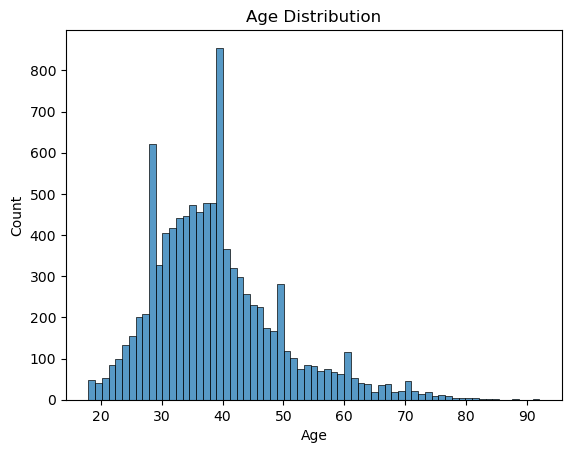

In [21]:
plt.figure()
plt.title('Age Distribution')
sns.histplot(df['Age'])

<AxesSubplot:title={'center':'Age Distribution'}, ylabel='Age'>

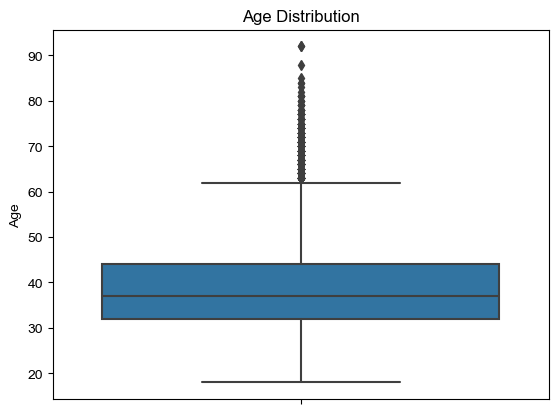

In [22]:
plt.figure()
plt.title('Age Distribution')
sns.set_style('darkgrid')
sns.boxplot(y=df['Age'])

In [23]:
print(df['Age'].mean())
print(df['Age'].median())

38.9218
37.0


Removing outliers

In [24]:
Q1=np.quantile(df['Age'],0.95)
df=df[df['Age']<Q1]
df.shape

(9474, 12)

In [25]:
print(df['Age'].mean())
print(df['Age'].median())

37.383681655055945
37.0


In [26]:
df[['Age','Exited']].groupby(['Exited']).agg(['mean'])

,Age
,mean
Exited,
0,35.889504
1,43.379365


/Users/gayathrigurram/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

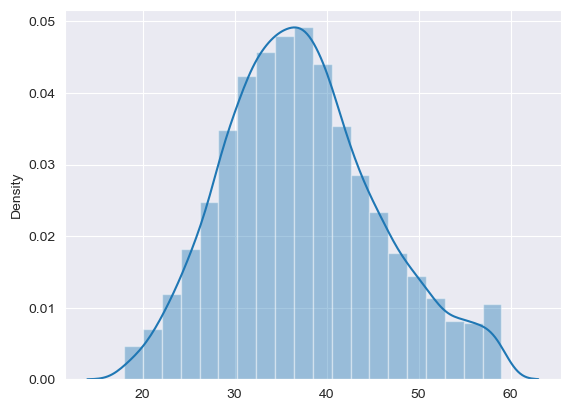

In [27]:
sns.distplot(x=df['Age'],bins=20,hist=True)

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

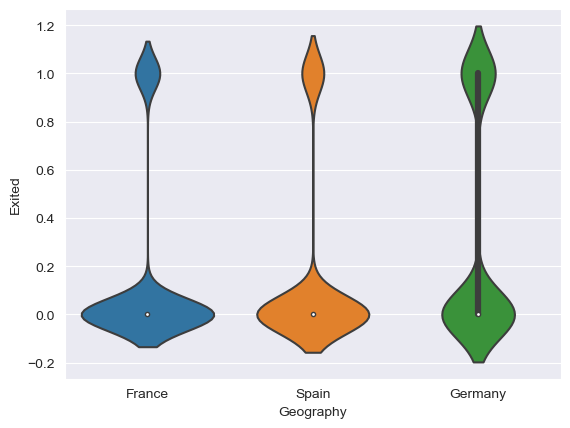

In [28]:
sns.violinplot(x=df['Geography'],y=df['Exited'])

In [29]:
from mpl_toolkits import mplot3d

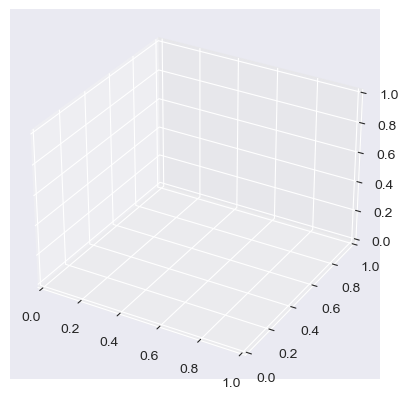

In [30]:
fig=plt.figure()
ax=plt.axes(projection='3d')

In [31]:
xdata=df['Age']

In [32]:
ydata=df['Exited']
zdata=np.cos(xdata)

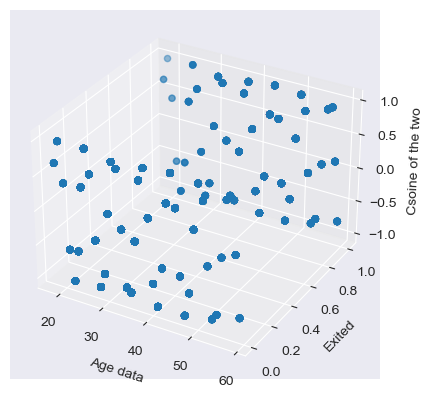

In [33]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(xdata,ydata,zdata)
ax.set_xlabel('Age data')
ax.set_ylabel('Exited')
ax.set_zlabel('Csoine of the two')
plt.savefig('3D_scatter.png',dpi=300)